<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【実践】Pythonで株の取引データを分析し予測してみよう！

## 概要
以下URLの記事を参考にすすめる

## URL
https://toukei-lab.com/python_stock

In [13]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

# ターゲットを指定
ticker = 'AMZN'

# データを収集
data = yf.download(ticker, period='7d', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,95.750000,100.989998,95.610001,100.040001,100.040001,84446900
2023-03-17,99.790001,100.660004,97.459999,98.949997,98.949997,87173200
2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900
2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300
2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400


<Axes: xlabel='Date'>

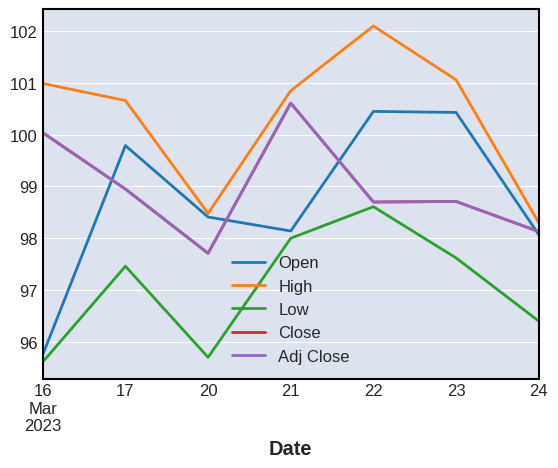

In [15]:
df = data
df = df.drop('Volume', axis=1)

# 可視化する
df.plot()

In [16]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


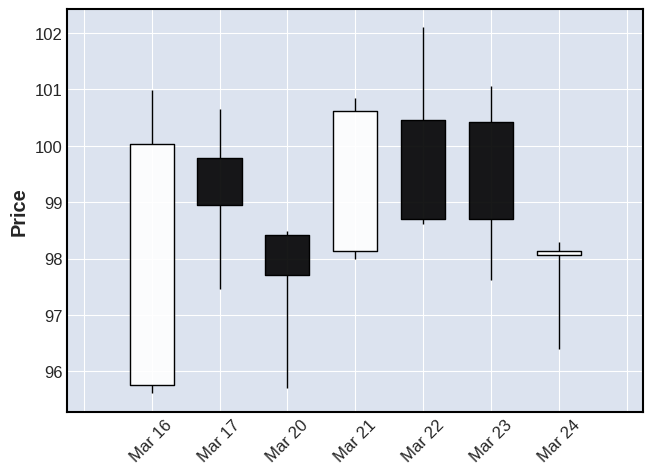

In [17]:
import mplfinance as mpf

# ローソク足グラフの表示
mpf.plot(df, type='candle')

[*********************100%***********************]  1 of 1 completed


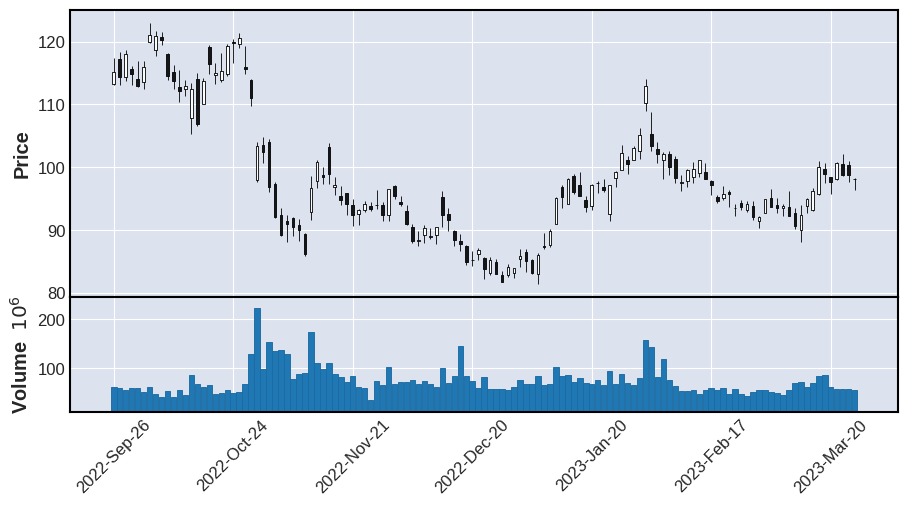

In [19]:
# データを収集
df = yf.download(ticker, period='6mo', interval='1d')
# ローソク足グラフの表示
mpf.plot(df, type='candle', volume=True, figratio=(10, 5))

In [22]:
# データを収集
data = yf.download(ticker, period='6mo', interval='1d')
# 移動平均を使用に加える
price = df['Close']
span = 5
df['sma05'] = price.rolling(window=span, min_periods=1).mean()

[*********************100%***********************]  1 of 1 completed


In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,sma05
Date,,,,,,,
2022-09-26,113.300003,117.339996,113.129997,115.150002,115.150002,62723300,115.150002
2022-09-27,117.199997,118.320000,113.050003,114.410004,114.410004,60094700,114.780003
2022-09-28,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,115.856669
2022-09-29,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,115.592503
2022-09-30,114.080002,116.919998,112.839996,113.000000,113.000000,59479600,115.074002
...,...,...,...,...,...,...,...
2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900,97.555998
2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300,98.701999
2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400,99.201999


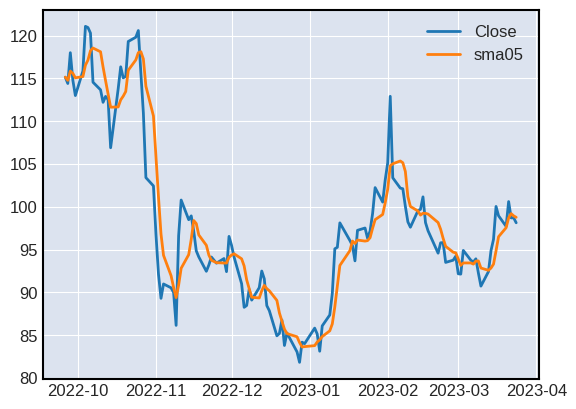

In [24]:
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['sma05'], label='sma05')
plt.legend()

In [25]:
# ARIMAモデル データ準備
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
train_data = train_data['Close'].values
test_data = test_data['Close'].values

In [26]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from statsmodels.tsa.arima.model import ARIMA